In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import FunctionTransformer

## Read Data From File

In [2]:
# https://www.youtube.com/watch?v=iNlZ3IU5Ffw
data = pd.read_csv('../data/training_data.csv', index_col=0)
data.fillna(0, inplace=True)

col = ["Id", "Contributions", "JavaScript", "Python", "Java", "C#", "PHP", "TypeScript", "Ruby", "C++", "C", "Swift", "Go", "Shell", "Kotlin", "Rust", "PowerShell", "Objective-C", "R", "MATLAB", "Dart", "Vue", "Assembly", "Sass", "CSS", "HTML", "Pascal", "Racket", "Zig", "Other"]
tcols = [x + '-T' for x in col]

In [3]:
data.head()

,CreatedAt,AvatarUrl,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/1?v=4,1,79,1971706,0,0,0,0,2566242,...,0,0,0,0,7758,17442,0,0,0,240167
defunkt,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/2?u=76...,1,1,4609687,0,0,0,0,0,...,0,0,0,0,6399,23938,0,0,0,896415
wycats,2008-01-12T05:38:33Z,https://avatars.githubusercontent.com/u/4?v=4,2,358,3378185,0,0,0,0,2687760,...,0,0,0,0,21641,441513,0,0,0,3060
brynary,2008-01-13T10:19:47Z,https://avatars.githubusercontent.com/u/19?u=c...,2,3485,11661,0,0,0,0,0,...,0,0,0,0,0,17954,0,0,0,3142
kevinclark,2008-01-13T18:33:26Z,https://avatars.githubusercontent.com/u/20?v=4,2,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8688


## Transform Data

#### 1. Make the bytes into percentages

In [4]:
def turn_to_percent(X, columns):
    X[columns] = X[columns].div(X[columns].sum(axis=1), axis=0)
    return X

# Create a FunctionTransformer using the defined function and pass the subset_columns argument
transformer = FunctionTransformer(turn_to_percent, validate=False, kw_args={'columns': col[2:]})

# Apply the transformation to your dataset
data = transformer.transform(data)
data.head()

,CreatedAt,AvatarUrl,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/1?v=4,1,79,0.343514,0.0,0.0,0.0,0.0,0.447096,...,0.0,0.0,0.0,0.0,0.001352,0.003039,0.0,0.0,0.0,0.041842
defunkt,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/2?u=76...,1,1,0.718800,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000998,0.003733,0.0,0.0,0.0,0.139780
wycats,2008-01-12T05:38:33Z,https://avatars.githubusercontent.com/u/4?v=4,2,358,0.516904,0.0,0.0,0.0,0.0,0.411260,...,0.0,0.0,0.0,0.0,0.003311,0.067557,0.0,0.0,0.0,0.000468
brynary,2008-01-13T10:19:47Z,https://avatars.githubusercontent.com/u/19?u=c...,2,3485,0.011735,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.018068,0.0,0.0,0.0,0.003162
kevinclark,2008-01-13T18:33:26Z,https://avatars.githubusercontent.com/u/20?v=4,2,18,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.045699


#### 2. Standardize the data using a StandardScaler

In [5]:
scaler = StandardScaler()

data[tcols] = scaler.fit_transform(data[col])
data.head()

,CreatedAt,AvatarUrl,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,...,Dart-T,Vue-T,Assembly-T,Sass-T,CSS-T,HTML-T,Pascal-T,Racket-T,Zig-T,Other-T
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/1?v=4,1,79,0.343514,0.0,0.0,0.0,0.0,0.447096,...,-0.082011,-0.140563,-0.072647,-0.046271,-0.329926,-0.398384,-0.03882,-0.021849,-0.019809,-0.361688
defunkt,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/2?u=76...,1,1,0.718800,0.0,0.0,0.0,0.0,0.000000,...,-0.082011,-0.140563,-0.072647,-0.046271,-0.333510,-0.394201,-0.03882,-0.021849,-0.019809,0.007134
wycats,2008-01-12T05:38:33Z,https://avatars.githubusercontent.com/u/4?v=4,2,358,0.516904,0.0,0.0,0.0,0.0,0.411260,...,-0.082011,-0.140563,-0.072647,-0.046271,-0.310073,-0.009502,-0.03882,-0.021849,-0.019809,-0.517498
brynary,2008-01-13T10:19:47Z,https://avatars.githubusercontent.com/u/19?u=c...,2,3485,0.011735,0.0,0.0,0.0,0.0,0.000000,...,-0.082011,-0.140563,-0.072647,-0.046271,-0.343618,-0.307795,-0.03882,-0.021849,-0.019809,-0.507354
kevinclark,2008-01-13T18:33:26Z,https://avatars.githubusercontent.com/u/20?v=4,2,18,0.000000,0.0,0.0,0.0,0.0,0.000000,...,-0.082011,-0.140563,-0.072647,-0.046271,-0.343618,-0.416700,-0.03882,-0.021849,-0.019809,-0.347165


#### 3. Determine Number of Clusters

In [6]:
def optimize_kmeans(data, max_k):
    inertia = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        inertia.append(kmeans.inertia_)
    
    # generate elbow
    fig = plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_k), inertia)
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Elbow Method')
    plt.show()

d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarni

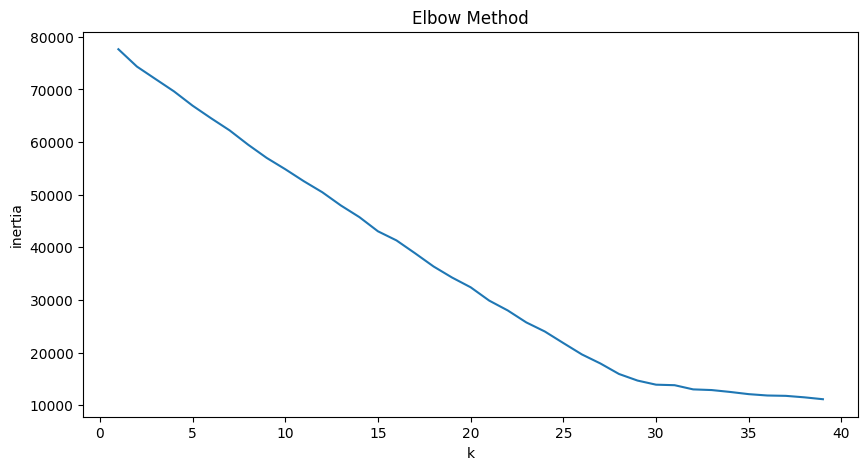

In [7]:
optimize_kmeans(data[tcols], 40)

#### 4 Apply K-Means Clustering

In [8]:
num_clusters = 30
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data[tcols])
data['cluster'] = kmeans.labels_
data.head()

d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CreatedAt,AvatarUrl,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,...,Vue-T,Assembly-T,Sass-T,CSS-T,HTML-T,Pascal-T,Racket-T,Zig-T,Other-T,cluster
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/1?v=4,1,79,0.343514,0.0,0.0,0.0,0.0,0.447096,...,-0.140563,-0.072647,-0.046271,-0.329926,-0.398384,-0.03882,-0.021849,-0.019809,-0.361688,5
defunkt,2007-10-20T05:24:19Z,https://avatars.githubusercontent.com/u/2?u=76...,1,1,0.718800,0.0,0.0,0.0,0.0,0.000000,...,-0.140563,-0.072647,-0.046271,-0.333510,-0.394201,-0.03882,-0.021849,-0.019809,0.007134,6
wycats,2008-01-12T05:38:33Z,https://avatars.githubusercontent.com/u/4?v=4,2,358,0.516904,0.0,0.0,0.0,0.0,0.411260,...,-0.140563,-0.072647,-0.046271,-0.310073,-0.009502,-0.03882,-0.021849,-0.019809,-0.517498,6
brynary,2008-01-13T10:19:47Z,https://avatars.githubusercontent.com/u/19?u=c...,2,3485,0.011735,0.0,0.0,0.0,0.0,0.000000,...,-0.140563,-0.072647,-0.046271,-0.343618,-0.307795,-0.03882,-0.021849,-0.019809,-0.507354,7
kevinclark,2008-01-13T18:33:26Z,https://avatars.githubusercontent.com/u/20?v=4,2,18,0.000000,0.0,0.0,0.0,0.0,0.000000,...,-0.140563,-0.072647,-0.046271,-0.343618,-0.416700,-0.03882,-0.021849,-0.019809,-0.347165,18


## Write K-Means Model to File

In [9]:
with open('../data/kmeansmodel.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

## Write Means to File

In [10]:
mean = data[col].mean()
std = data[col].std()
with open("../data/meanAndStd.csv", "w") as f:
    f.write(",".join([x for x in col]) + "\n")
    f.write(",".join([str(mean[x]) for x in col]) + "\n")
    f.write(",".join([str(std[x]) if std[x] != 0 else "1.0" for x in col]) + "\n")


## Write Clusterized Data to File

In [11]:
clusterized_col = ["CreatedAt", "AvatarUrl"] + col + ['cluster']
with open("../data/clustered_data.csv", 'w') as f:
    f.write("Username," + ",".join([x for x in clusterized_col]) + "\n")
    for index, row in data.iterrows():
        f.write(index + "," + ",".join([str(row[x]) for x in clusterized_col]) + "\n")


## Debugging Code

In [12]:
train = data.sample(n=1)
train.drop(columns=['cluster'], inplace=True)

v = kmeans.predict(train[tcols])
v


array([4])